## Risk-Return Analysis for AAPL and TSLA Relative to the S&P 500

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_sp = pd.read_excel("data/S&P 500.xlsx", parse_dates=["Date"]).rename(columns={"Adjusted Close": "mkt"})
df_aapl = pd.read_excel("data/AAPL.xlsx", parse_dates=["Date"]).rename(columns={"Adjusted Close": "aapl"})
df_tsla = pd.read_excel("data/TSLA.xlsx", parse_dates=["Date"]).rename(columns={"Adjusted Close": "tsla"})

In [3]:
df = df_sp.merge(df_aapl, on="Date").merge(df_tsla, on="Date")
df = df.set_index("Date").sort_index()

returns = df.pct_change().dropna()

In [4]:
df.head()

,Open_x,High_x,Low_x,Cloe,mkt,Volume_x,Open_y,High_y,Low_y,Close_x,aapl,Volume_y,Open,High,Low,Close_y,tsla,Volume
Date,,,,,,,,,,,,,,,,,,
2024-11-08,5976.76,6012.45,5976.76,5995.54,5995.54,4666740000,227.17,228.66,226.41,226.96,226.16,38328800,299.14,328.71,297.66,321.22,321.22,204782800
2024-11-11,6008.86,6017.31,5986.69,6001.35,6001.35,4333000000,225.00,225.70,221.50,224.23,223.44,42005600,346.30,358.64,336.00,350.00,350.00,210521600
2024-11-12,6003.60,6009.92,5960.08,5983.99,5983.99,4243400000,224.55,225.59,223.36,224.23,223.44,40398300,342.74,345.84,323.31,328.49,328.49,155726000
2024-11-13,5985.75,6008.19,5965.91,5985.38,5985.38,4220180000,224.01,226.65,222.76,225.12,224.32,48566200,335.85,344.60,322.50,330.24,330.24,125405600
2024-11-14,5989.68,5993.88,5942.28,5949.17,5949.17,4184570000,225.02,228.87,225.00,228.22,227.41,44923900,327.69,329.98,310.37,311.18,311.18,120726100


In [5]:
display(df.tail())
df.info()

,Open_x,High_x,Low_x,Cloe,mkt,Volume_x,Open_y,High_y,Low_y,Close_x,aapl,Volume_y,Open,High,Low,Close_y,tsla,Volume
Date,,,,,,,,,,,,,,,,,,
2025-11-03,6882.32,6882.32,6820.62,6851.97,6851.97,6065720000,270.42,270.85,266.25,269.05,269.05,50194600,455.99,474.07,453.80,468.37,468.37,84595200
2025-11-04,6788.52,6820.21,6766.71,6771.55,6771.55,5739510000,268.33,271.49,267.62,270.04,270.04,49274800,454.46,460.22,443.60,444.26,444.26,87756600
2025-11-05,6769.77,6829.78,6763.11,6796.29,6796.29,5939600000,268.61,271.70,266.93,270.14,270.14,43683100,452.05,466.33,440.71,462.07,462.07,85573000
2025-11-06,6787.59,6796.68,6707.51,6720.32,6720.32,6051900000,267.89,273.40,267.89,269.77,269.77,51204000,461.96,467.45,435.09,445.91,445.91,109622900
2025-11-07,6696.18,6730.11,6631.44,6728.80,6728.80,5926070000,269.80,272.29,266.77,268.47,268.47,48203600,437.92,439.36,421.88,429.52,429.52,103091100


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-11-08 to 2025-11-07
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open_x    250 non-null    float64
 1   High_x    250 non-null    float64
 2   Low_x     250 non-null    float64
 3   Cloe      250 non-null    float64
 4   mkt       250 non-null    float64
 5   Volume_x  250 non-null    int64  
 6   Open_y    250 non-null    float64
 7   High_y    250 non-null    float64
 8   Low_y     250 non-null    float64
 9   Close_x   250 non-null    float64
 10  aapl      250 non-null    float64
 11  Volume_y  250 non-null    int64  
 12  Open      250 non-null    float64
 13  High      250 non-null    float64
 14  Low       250 non-null    float64
 15  Close_y   250 non-null    float64
 16  tsla      250 non-null    float64
 17  Volume    250 non-null    int64  
dtypes: float64(15), int64(3)
memory usage: 37.1 KB


In [6]:
returns.head()

,Open_x,High_x,Low_x,Cloe,mkt,Volume_x,Open_y,High_y,Low_y,Close_x,aapl,Volume_y,Open,High,Low,Close_y,tsla,Volume
Date,,,,,,,,,,,,,,,,,,
2024-11-11,0.005371,0.000808,0.001661,0.000969,0.000969,-0.071515,-0.009552,-0.012945,-0.021686,-0.012029,-0.012027,0.095928,0.157652,0.091053,0.128805,0.089596,0.089596,0.028024
2024-11-12,-0.000875,-0.001228,-0.004445,-0.002893,-0.002893,-0.020679,-0.002000,-0.000487,0.008397,0.000000,0.000000,-0.038264,-0.010280,-0.035690,-0.037768,-0.061457,-0.061457,-0.260285
2024-11-13,-0.002973,-0.000288,0.000978,0.000232,0.000232,-0.005472,-0.002405,0.004699,-0.002686,0.003969,0.003938,0.202184,-0.020103,-0.003585,-0.002505,0.005327,0.005327,-0.194704
2024-11-14,0.000657,-0.002382,-0.003961,-0.006050,-0.006050,-0.008438,0.004509,0.009795,0.010056,0.013770,0.013775,-0.074997,-0.024297,-0.042426,-0.037612,-0.057716,-0.057716,-0.037315
2024-11-15,-0.012837,-0.013107,-0.015023,-0.013204,-0.013204,0.097116,0.006133,-0.008520,-0.003244,-0.014109,-0.014115,0.066775,-0.052244,-0.016062,-0.003705,0.030657,0.030657,-0.052067


In [7]:
#using a constant annual risk free rate 3 percent per year and 252 trading days
annual_rf = 0.03
trading_days = 252

#convert to daily constant risk free rate (approx)
daily_rf = (1 + annual_rf) ** (1 / trading_days) - 1

In [8]:
#create a daily risk free series aligned with the data index
rf_daily = pd.Series(daily_rf, index=returns.index, name="rf")

In [9]:
sharpe_ratios = {}

for col in returns.columns:
    excess = returns[col] - rf_daily
    mean_excess_daily = excess.mean()
    std_daily = excess.std()

    sharpe_annual = np.sqrt(trading_days) * mean_excess_daily / std_daily
    sharpe_ratios[col] = sharpe_annual

print("Annual Sharpe ratios:")
for asset, val in sharpe_ratios.items():
    print(f"{asset}: {val:.3f}")

Annual Sharpe ratios:
Open_x: 0.547
High_x: 0.709
Low_x: 0.537
Cloe: 0.557
mkt: 0.557
Volume_x: 1.415
Open_y: 0.592
High_y: 0.682
Low_y: 0.614
Close_x: 0.591
aapl: 0.602
Volume_y: 2.425
Open: 0.853
High: 0.753
Low: 0.841
Close_y: 0.727
tsla: 0.727
Volume: 1.891


In [10]:
#r_it - r_ft = alpha_i + beta_i (r_mt - r_ft) + eps_t

results = {}


mkt_excess = returns["mkt"] - rf_daily
mkt_excess.name = "mkt_excess"

for stock in ["aapl", "tsla"]:     
    #stock excess return
    stock_excess = returns[stock] - rf_daily
    stock_excess.name = "stock_excess"

    
    df_reg = pd.concat([stock_excess, mkt_excess], axis=1).dropna()

    y = df_reg["stock_excess"]
    X = sm.add_constant(df_reg["mkt_excess"])  

    model = sm.OLS(y, X).fit()

    alpha_daily = model.params["const"]
    beta = model.params["mkt_excess"]

    # Annualize alpha
    alpha_annual = alpha_daily * trading_days

    results[stock] = {
        "alpha_daily": alpha_daily,
        "alpha_annual": alpha_annual,
        "beta": beta,
        "r2": model.rsquared
    }

for stock, res in results.items():
    print(f"\n{stock.upper()} vs S&P500")
    print(f"Alpha (daily):  {res['alpha_daily']:.6f}")
    print(f"Alpha (annual): {res['alpha_annual']:.4f}")
    print(f"Beta:           {res['beta']:.4f}")
    print(f"R^2:            {res['r2']:.4f}")


AAPL vs S&P500
Alpha (daily):  0.000236
Alpha (annual): 0.0594
Beta:           1.3091
R^2:            0.5680

TSLA vs S&P500
Alpha (daily):  0.000926
Alpha (annual): 0.2332
Beta:           2.3842
R^2:            0.4552


In [11]:
beta_aapl = np.cov(returns["aapl"], returns["mkt"])[0, 1] / np.var(returns["mkt"])
beta_tsla = np.cov(returns["tsla"], returns["mkt"])[0, 1] / np.var(returns["mkt"])

print(f"Beta aapl (covariance formula): {beta_aapl:.4f}")
print(f"Beta tsla (covariance formula): {beta_tsla:.4f}")

Beta aapl (covariance formula): 1.3144
Beta tsla (covariance formula): 2.3939


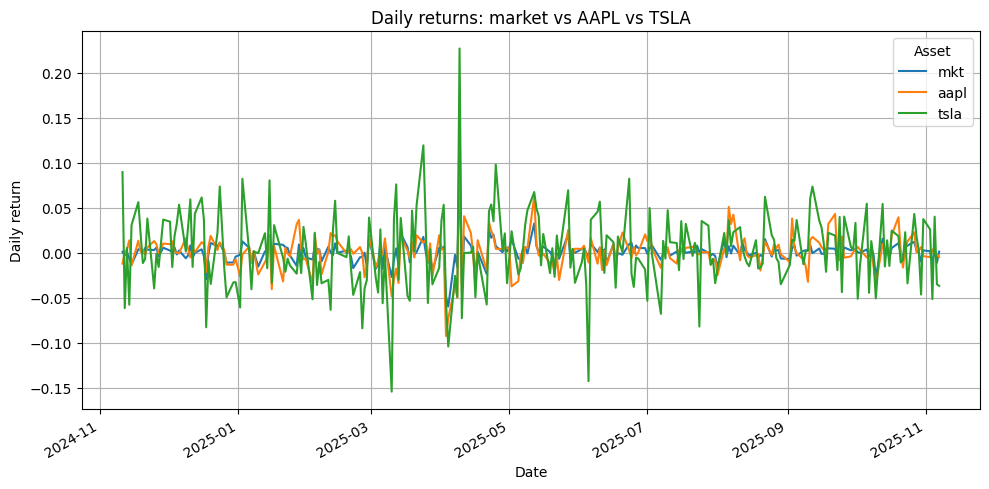

In [12]:
#time series of daily returns for market and stocks


fig, ax = plt.subplots(figsize=(10, 5))
returns[["mkt", "aapl", "tsla"]].plot(ax=ax)

ax.set_title("Daily returns: market vs AAPL vs TSLA")
ax.set_ylabel("Daily return")
ax.set_xlabel("Date")
ax.legend(title="Asset")
ax.grid(True)

plt.tight_layout()
plt.show()

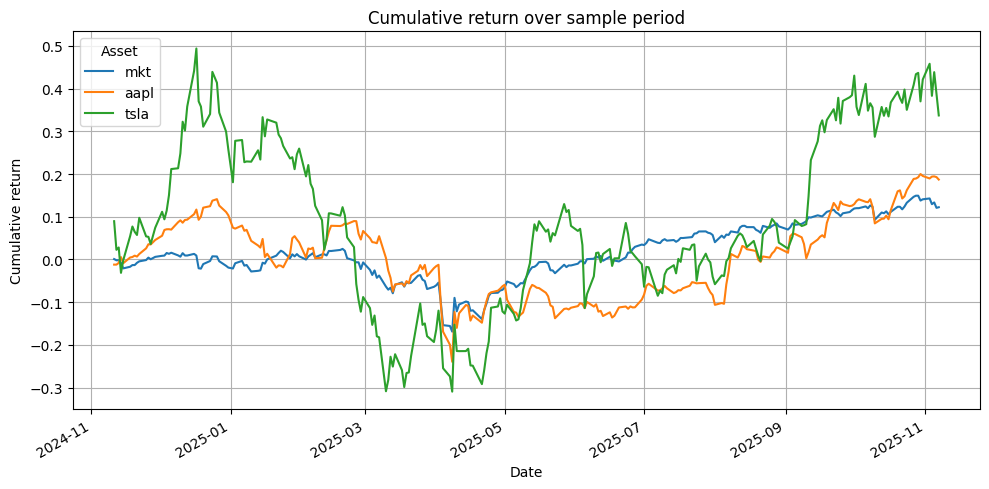

In [13]:
#Cumulative returns
cum_ret = (1 + returns[["mkt", "aapl", "tsla"]]).cumprod() - 1

fig, ax = plt.subplots(figsize=(10, 5))
cum_ret.plot(ax=ax)

ax.set_title("Cumulative return over sample period")
ax.set_ylabel("Cumulative return")
ax.set_xlabel("Date")
ax.legend(title="Asset")
ax.grid(True)

plt.tight_layout()
plt.show()

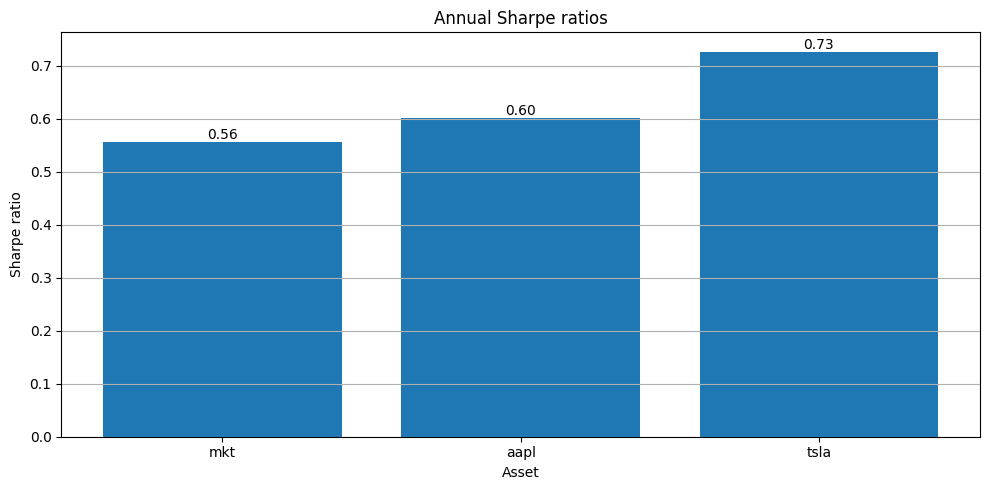

In [14]:
#Bar chart of annual Sharpe ratios

assets = ["mkt", "aapl", "tsla"]
sharpe_vals = [sharpe_ratios[a] for a in assets]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(assets, sharpe_vals)

ax.set_title("Annual Sharpe ratios")
ax.set_ylabel("Sharpe ratio")
ax.set_xlabel("Asset")
ax.grid(axis="y")

for i, v in enumerate(sharpe_vals):
    ax.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


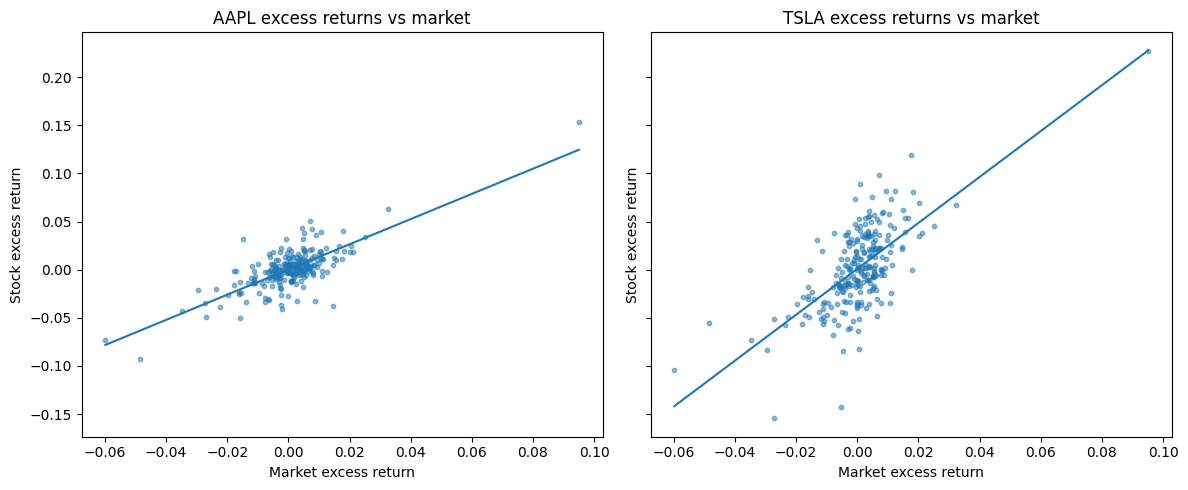

In [15]:
#CAPM scatter plot with fitted line

mkt_excess = returns["mkt"] - rf_daily

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

for ax, stock in zip(axes, ["aapl", "tsla"]):
    stock_excess = returns[stock] - rf_daily


    alpha = results[stock]["alpha_daily"]
    beta = results[stock]["beta"]

    ax.scatter(mkt_excess, stock_excess, s=10, alpha=0.5)

    x_grid = np.linspace(mkt_excess.min(), mkt_excess.max(), 100)
    y_hat = alpha + beta * x_grid
    ax.plot(x_grid, y_hat)

    ax.set_title(f"{stock.upper()} excess returns vs market")
    ax.set_xlabel("Market excess return")
    ax.set_ylabel("Stock excess return")

plt.tight_layout()
plt.show()


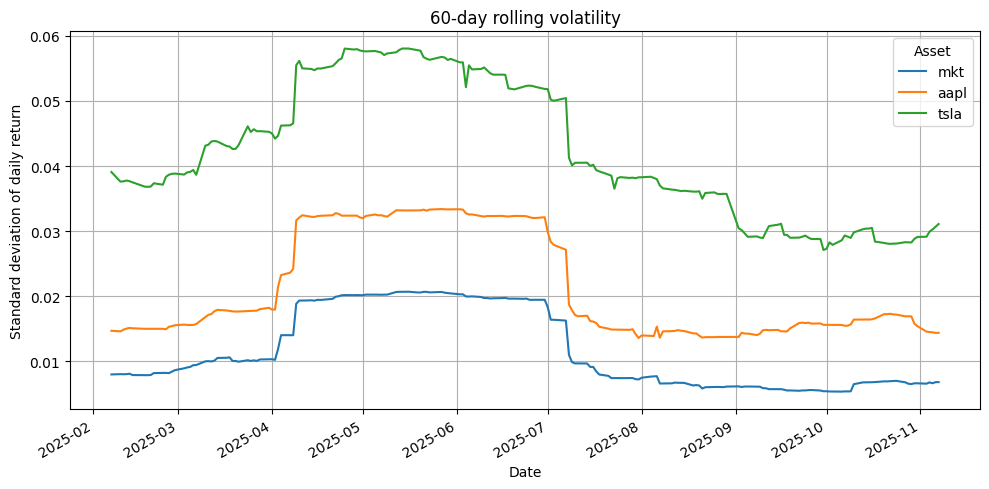

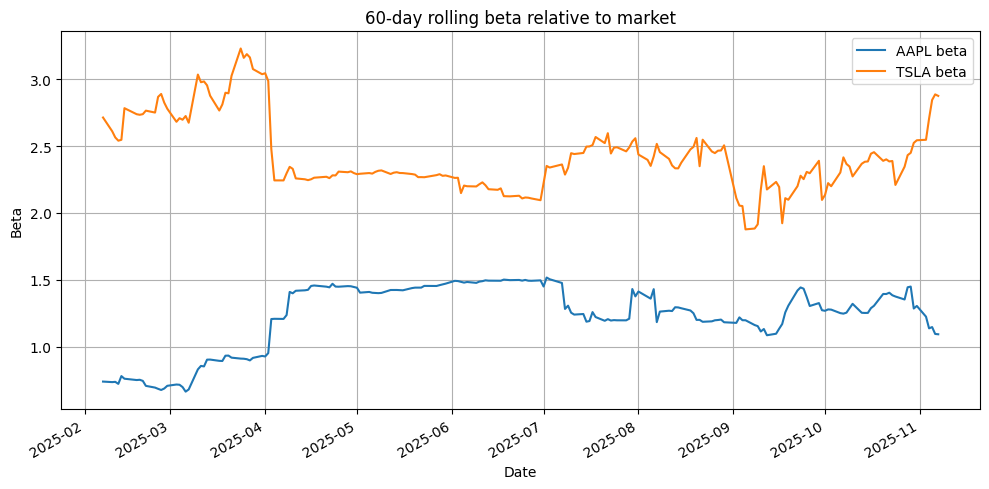

In [16]:
#Rolling volatility and rolling beta

window = 60 

#rolling standard deviation of returns
rolling_vol = returns[["mkt", "aapl", "tsla"]].rolling(window).std()

fig, ax = plt.subplots(figsize=(10, 5))
rolling_vol.plot(ax=ax)
ax.set_title(f"{window}-day rolling volatility")
ax.set_ylabel("Standard deviation of daily return")
ax.set_xlabel("Date")
ax.legend(title="Asset")
ax.grid(True)
plt.tight_layout()
plt.show()

#rolling beta using covariance formula
rolling_beta_aapl = (
    returns["aapl"].rolling(window).cov(returns["mkt"])
    / returns["mkt"].rolling(window).var()
)
rolling_beta_tsla = (
    returns["tsla"].rolling(window).cov(returns["mkt"])
    / returns["mkt"].rolling(window).var()
)

fig, ax = plt.subplots(figsize=(10, 5))
rolling_beta_aapl.plot(ax=ax, label="AAPL beta")
rolling_beta_tsla.plot(ax=ax, label="TSLA beta")

ax.set_title(f"{window}-day rolling beta relative to market")
ax.set_ylabel("Beta")
ax.set_xlabel("Date")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

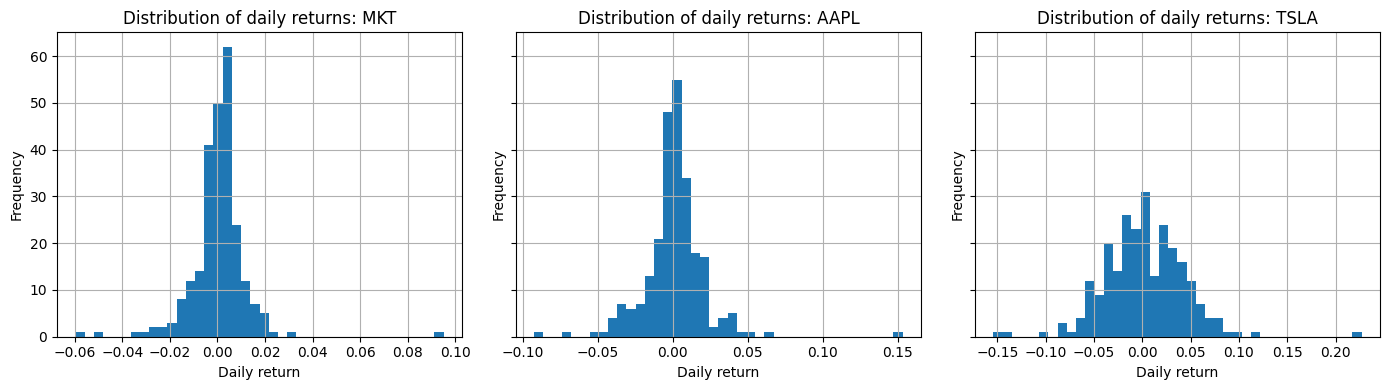

In [17]:
#Histogram of daily returns (distribution and tails)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

for ax, col in zip(axes, ["mkt", "aapl", "tsla"]):
    ax.hist(returns[col], bins=40)
    ax.set_title(f"Distribution of daily returns: {col.upper()}")
    ax.set_xlabel("Daily return")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()


#### Conclusion

The figure provides a detailed picture of how AAPL and TSLA differ in their return and risk profiles relative to the market (S&P500) within the sample period (Nov 8 2024 - Nov 7 2025).

When you look at returns compared to risk, Apple actually looks better. Yes, Tesla sometimes makes more money during certain periods, but Apple gives you better returns for the amount of risk you're taking.

Both stocks move with the broader stock market, but Tesla reacts much more strongly. When the market goes up or down, Tesla tends to swing even more in that same direction. Apple is more stable and doesn't overreact as much to market changes. This relationship also changes over time, with Tesla sometimes becoming even more sensitive to market swings.